In [7]:
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam

In [8]:
train_dir = "./input/train/"
train_df = pd.read_csv('./input/train.csv')
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [9]:
# train_samples, validation_samples = train_test_split(Image_List, test_size=0.2)

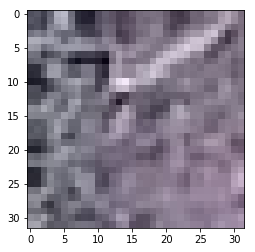

In [10]:
im = cv2.imread("./input/train/01e30c0ba6e91343a12d2126fcafc0dd.jpg")
plt.imshow(im)

In [11]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(32, 32, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
vgg16_net.trainable = False
vgg16_net.summary()

# Freeze the layers except the last 4 layers
# for layer in vgg16_net.layers[7:]:
#     layer.trainable = False
    
# Check the trainable status of the individual layers
# for layer in vgg16_net.layers:
#     print(layer, layer.trainable)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [13]:
model = Sequential()
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
X_tr = []
Y_tr = []
imges = train_df['id'].values
for img_id in tqdm_notebook(imges):
    X_tr.append(cv2.imread(train_dir + img_id))    
    Y_tr.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  
X_tr = np.asarray(X_tr)
X_tr = X_tr.astype('float32')
X_tr /= 255
Y_tr = np.asarray(Y_tr)

In [15]:
batch_size = 32
nb_epoch = 25

In [16]:
%%time
# Train model
history = model.fit(X_tr, Y_tr,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 15750 samples, validate on 1750 samples
Epoch 1/25
 - 97s - loss: 0.3567 - acc: 0.8386 - val_loss: 0.2077 - val_acc: 0.9406
Epoch 2/25
 - 99s - loss: 0.1920 - acc: 0.9327 - val_loss: 0.1518 - val_acc: 0.9537
Epoch 3/25
 - 98s - loss: 0.1527 - acc: 0.9450 - val_loss: 0.1301 - val_acc: 0.9554
Epoch 4/25
 - 99s - loss: 0.1357 - acc: 0.9512 - val_loss: 0.1196 - val_acc: 0.9617
Epoch 5/25
 - 99s - loss: 0.1233 - acc: 0.9547 - val_loss: 0.1137 - val_acc: 0.9617
Epoch 6/25
 - 99s - loss: 0.1164 - acc: 0.9571 - val_loss: 0.1037 - val_acc: 0.9600
Epoch 7/25
 - 99s - loss: 0.1098 - acc: 0.9589 - val_loss: 0.1030 - val_acc: 0.9640
Epoch 8/25
 - 99s - loss: 0.1039 - acc: 0.9617 - val_loss: 0.0955 - val_acc: 0.9629
Epoch 9/25
 - 99s - loss: 0.1010 - acc: 0.9634 - val_loss: 0.0950 - val_acc: 0.9657
Epoch 10/25
 - 99s - loss: 0.0966 - acc: 0.9637 - val_loss: 0.0895 - val_acc: 0.9657
Epoch 11/25
 - 98s - loss: 0.0937 - acc: 0.9657 - val_loss: 0.

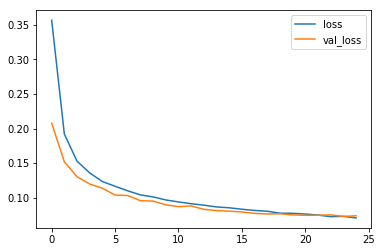

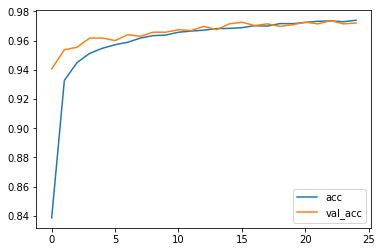

In [18]:
with open('history.json', 'w') as f:
    json.dump(history.history, f)

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()

In [19]:
vgg16_full = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(32, 32, 3))
vgg16_full.trainable = False
vgg16_full.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [20]:
model1 = Sequential()
model1.add(vgg16_full)
model1.add(Flatten())
model1.add(Dense(1))
model1.add(Activation('sigmoid'))
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4), 
              metrics=['accuracy'])

In [21]:
%%time
# Train model
history1 = model1.fit(X_tr, Y_tr,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 15750 samples, validate on 1750 samples
Epoch 1/25
 - 93s - loss: 0.5777 - acc: 0.7065 - val_loss: 0.5126 - val_acc: 0.7463
Epoch 2/25
 - 100s - loss: 0.4655 - acc: 0.7528 - val_loss: 0.4375 - val_acc: 0.7526
Epoch 3/25
 - 97s - loss: 0.4040 - acc: 0.7747 - val_loss: 0.3850 - val_acc: 0.7943
Epoch 4/25
 - 97s - loss: 0.3596 - acc: 0.8270 - val_loss: 0.3462 - val_acc: 0.8566
Epoch 5/25
 - 97s - loss: 0.3262 - acc: 0.8769 - val_loss: 0.3163 - val_acc: 0.8874
Epoch 6/25
 - 97s - loss: 0.2999 - acc: 0.9020 - val_loss: 0.2920 - val_acc: 0.9149
Epoch 7/25
 - 96s - loss: 0.2785 - acc: 0.9204 - val_loss: 0.2722 - val_acc: 0.9251
Epoch 8/25
 - 97s - loss: 0.2608 - acc: 0.9276 - val_loss: 0.2557 - val_acc: 0.9297
Epoch 9/25
 - 97s - loss: 0.2460 - acc: 0.9333 - val_loss: 0.2417 - val_acc: 0.9331
Epoch 10/25
 - 97s - loss: 0.2334 - acc: 0.9355 - val_loss: 0.2300 - val_acc: 0.9343
Epoch 11/25
 - 96s - loss: 0.2226 - acc: 0.9383 - val_loss: 0.2197 - val_acc: 0.9406
Epoch 12/25
 - 97s - los

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_62 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_63 (Activation)   (None, 1)                 0         
Total para

In [66]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
_________________________________________________________________
activation_64 (Activation)   (None, 1)                 0         
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________
